In [57]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import sys
import numpy as np
import scipy
from random import randrange
import warnings
from scipy.optimize import curve_fit

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots
import common.fit as fit

pd.options.mode.chained_assignment = None

In [82]:
fm_to_GeV = 1/0.197327
a = 0.048 * fm_to_GeV / 1000
print(a)

0.0002432510502870869


In [42]:
def collect_condensates(params):
    df1 = []
    for param in params:
        df1.append(pd.read_csv(param['path']))
        df1[-1]['Nt'] = param['Nt']
        df1[-1]['mu'] = param['mu']
    return pd.concat(df1)

def renormalize(df, observable_name):
    if(len(df[df['mu'] == 0][observable_name].to_numpy()) != 0):
        mu_zero = df[df['mu'] == 0][observable_name].to_numpy()[0]
        mu_err_zero = df[df['mu'] == 0]['err'].to_numpy()[0]
    elif (len(df[df['mu'] == 0.05][observable_name].to_numpy()) != 0):
        mu_zero = df[df['mu'] == 0.05][observable_name].to_numpy()[0]
        mu_err_zero = df[df['mu'] == 0.05]['err'].to_numpy()[0]
    else:
        mu_zero = 0
        mu_err_zero = 0
    if observable_name == 'chiral_condensate':
        df[observable_name] = df[observable_name] - mu_zero + 1
    elif observable_name == 'diquark_condensate':
        df[observable_name] = df[observable_name] - mu_zero
    df['err'] = np.sqrt(df['err']**2 + mu_err_zero**2)
    return df

def plot_chiral_condensate_nt(df, observable_name, x, group, image_path, image_name):
    print(f'{group} = ', df.name)
    nt_str = str(df.name)
    fg = seaborn.FacetGrid(data=df, hue='owner', height=5, aspect=1.61, legend_out=True)
    fg.map(plt.errorbar, x, observable_name, 'err', mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None
               ).add_legend()
    fg.ax.set_xlabel(x)
    fg.ax.set_ylabel('condensate')
    fg.ax.spines['right'].set_visible(True)
    fg.ax.spines['top'].set_visible(True)
    fg.ax.minorticks_on()
    fg.ax.tick_params(which='both', bottom=True,
                      top=True, left=True, right=True)
    plt.grid(dash_capstyle='round')
    plots.save_image(image_path, image_name + '_' + nt_str, fg)
    plt.show()

def plot_single(df, x, hue, observable, image_path, image_name, err_col=None):
    fg = seaborn.FacetGrid(data=df, hue=hue, height=5, aspect=1.61, legend_out=True)
    print(err_col)
    fg.map(plt.errorbar, x, observable, err_col=err_col, mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None
               ).add_legend()
    fg.ax.set_xlabel(x)
    fg.ax.set_ylabel(observable)
    fg.ax.spines['right'].set_visible(True)
    fg.ax.spines['top'].set_visible(True)
    fg.ax.minorticks_on()
    fg.ax.tick_params(which='both', bottom=True,
                      top=True, left=True, right=True)
    fg.ax.set_xlim(left=0)
    # fg.ax.set_yscale('log')
    plt.grid(dash_capstyle='round')
    plots.save_image(image_path, image_name, fg)
    plt.show()

def fit_data(df, observable_name):
    df_fit = fit.make_fit(df, (df['T'].min(), df['T'].max()), fit.func_polynomial3, ['a', 'b', 'c', 'd'], 'T', observable_name, err_col='err')
    return df_fit

def get_func_value(df, func, x_val, param_names):
    fit_params = df.iloc[0][param_names].values
    y = func(x_val, *fit_params)
    return pd.DataFrame({'value': [y]})

    Nt    mu  chiral_condensate       err     owner
37  20  0.00           1.000000  0.000036  Vladimir
38  20  0.05           0.999958  0.000027  Vladimir
39  20  0.10           0.999851  0.000026  Vladimir
40  20  0.15           0.999770  0.000026  Vladimir
41  20  0.20           0.999704  0.000027  Vladimir
42  20  0.25           0.999663  0.000027  Vladimir
43  20  0.30           0.999603  0.000028  Vladimir
0   20  0.15           0.999766  0.000026      Ilya
Nt =  6


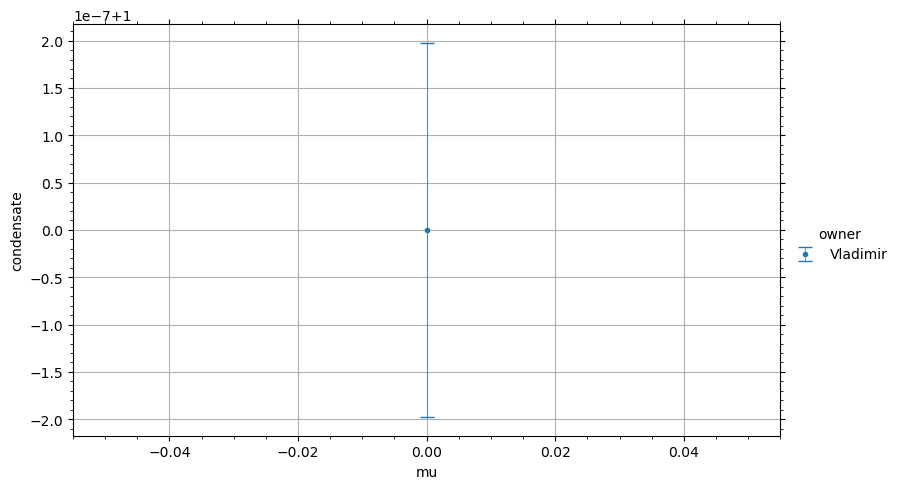

Nt =  8


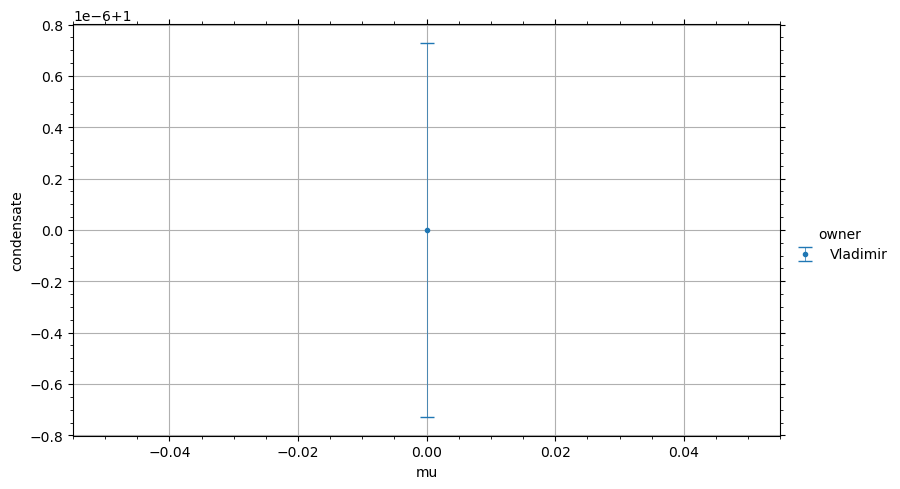

Nt =  10


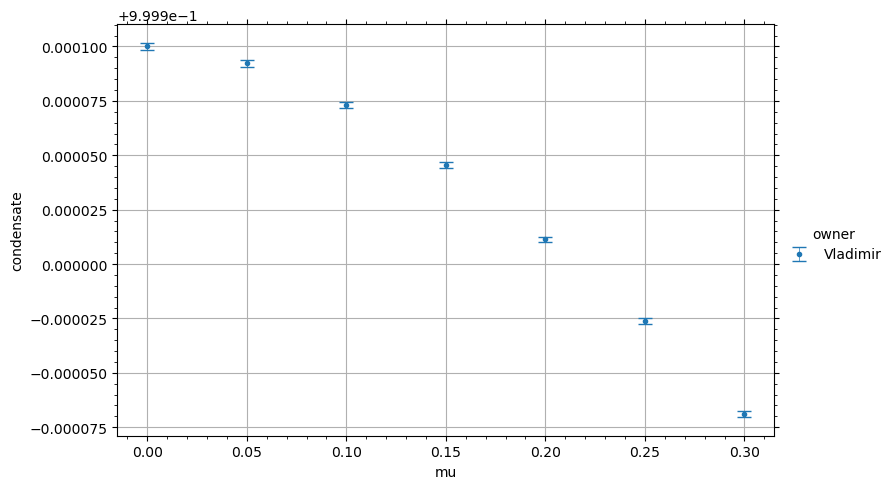

Nt =  12


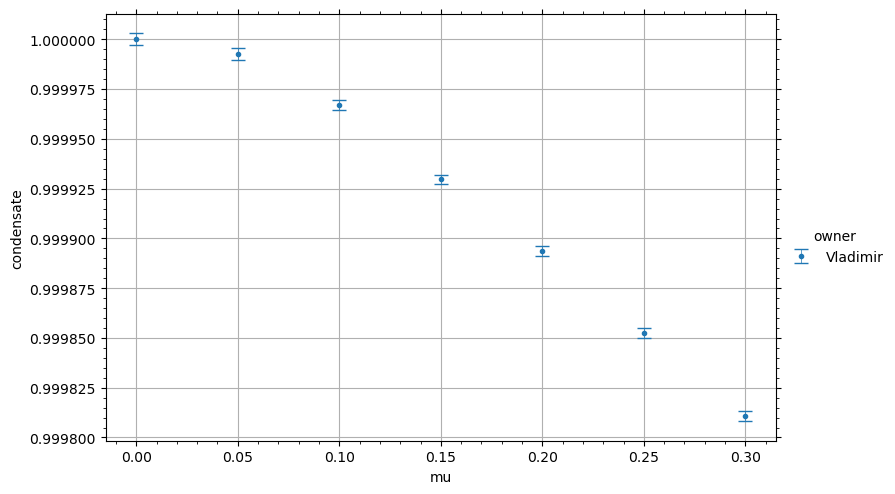

Nt =  14


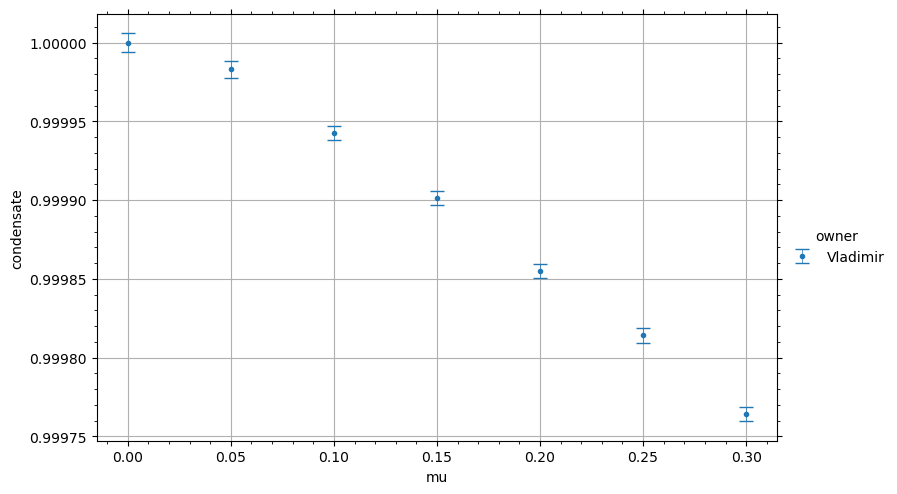

Nt =  16


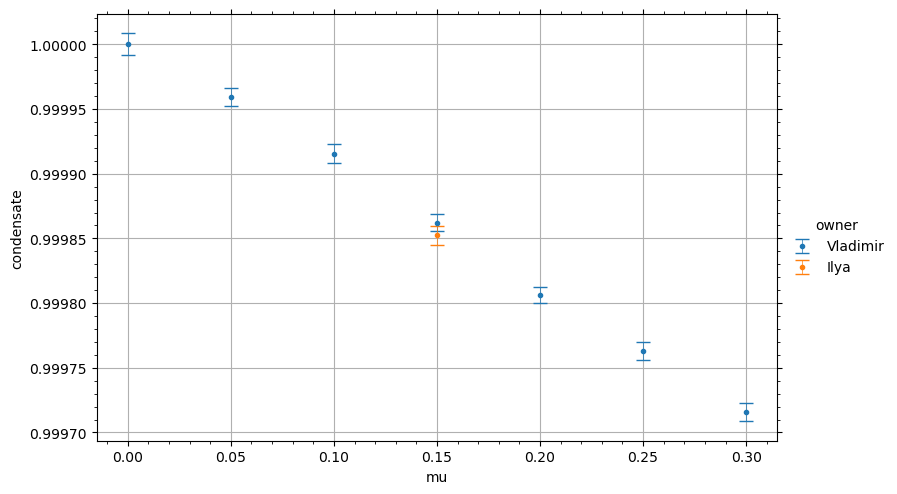

Nt =  18


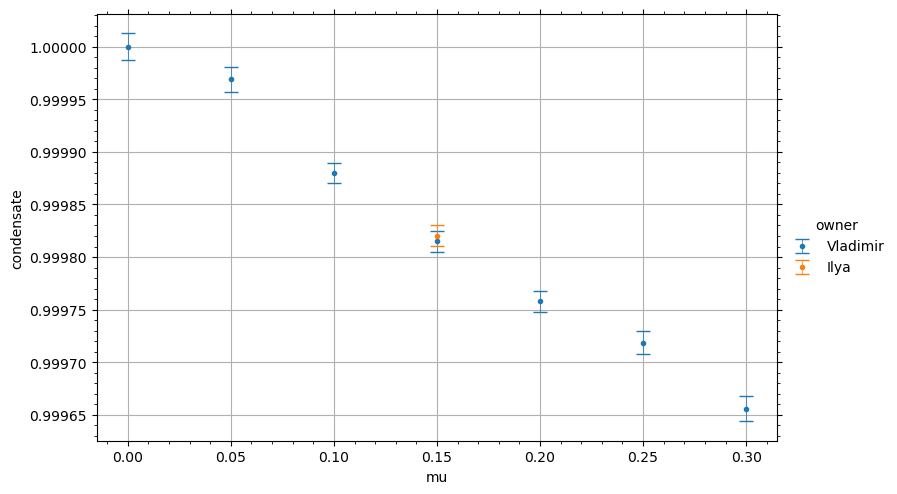

Nt =  20


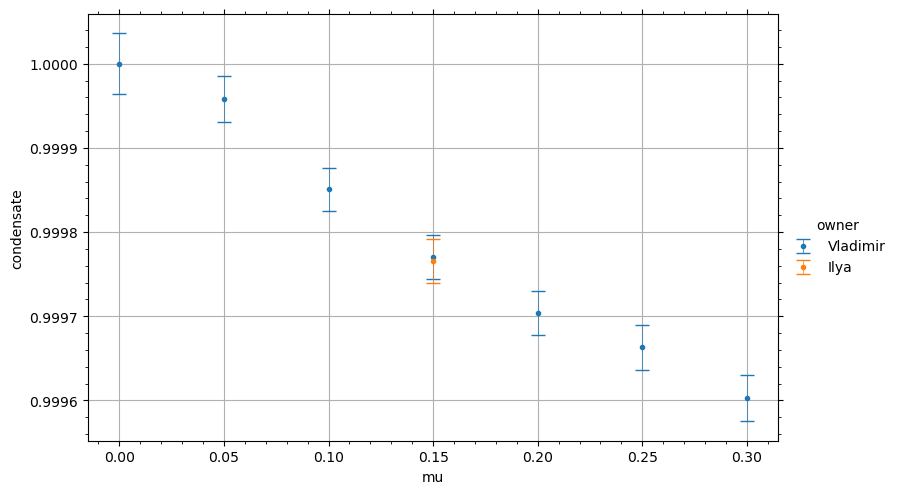

Nt =  22


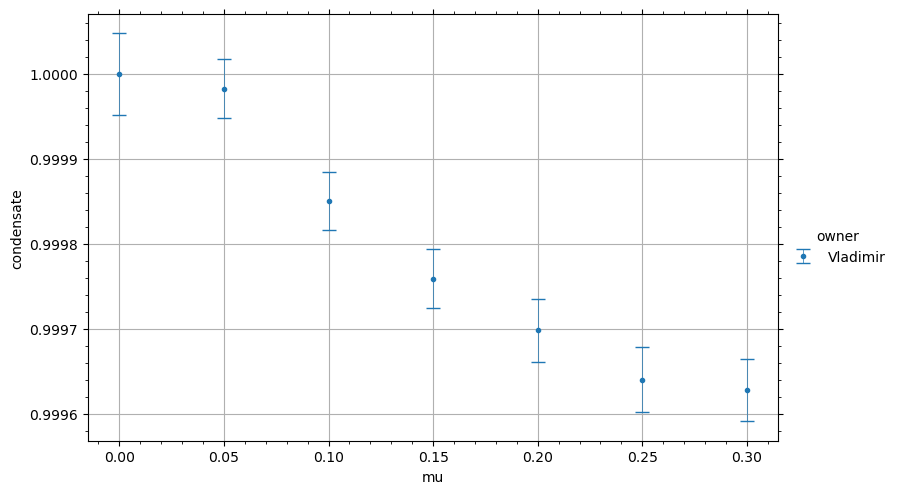

Nt =  24


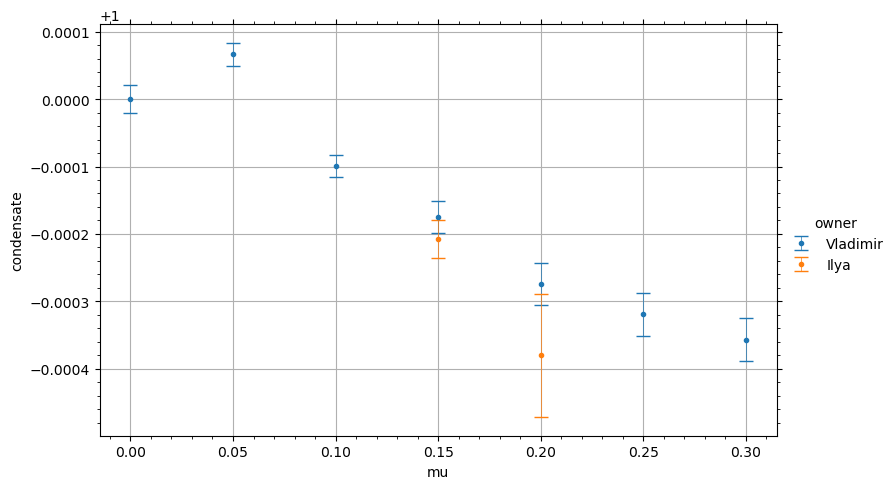

Nt =  26


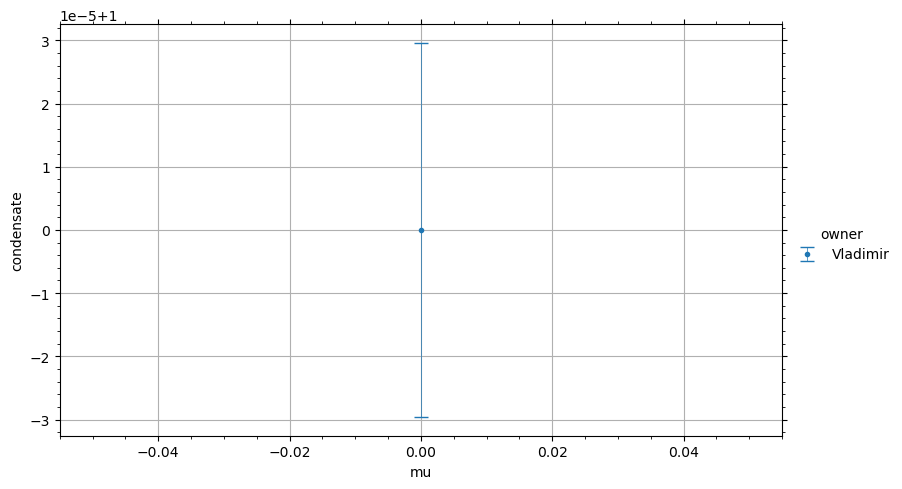

""


In [ ]:
df = pd.read_csv('../../result/vladimir_data/ChiralCond.txt', header=0, names=['Nt', 'mu', 'chiral_condensate', 'err', 'itime', 'fs', 'W', 's', 'iconf'], delimiter=' ', skipinitialspace=True, comment='#')
df = df[['Nt', 'mu', 'chiral_condensate', 'err']]
df['owner'] = 'Vladimir'
params = [{'path' : '../../result/condensates/su2/qc2dstag/32^3x16/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 16, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x18/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 18, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x20/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 20, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x24/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 24, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x24/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 24, 'mu': 0.20},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x28/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 28, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x28/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 28, 'mu': 0.20},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x36/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 36, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x36/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 36, 'mu': 0.20},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x40/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 40, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x40/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 40, 'mu': 0.20}]
df1 = collect_condensates(params)
df1 = df1.rename(columns={'err_chiral': 'err'})
df1 = df1[['Nt', 'mu', 'chiral_condensate', 'err']]
df1['owner'] = 'Ilya'
df = pd.concat([df, df1])
# print(df)
df = df.groupby(['Nt']).apply(renormalize, 'chiral_condensate', include_groups=False).reset_index(level=['Nt'])
print(df[df['Nt'] == 20])
df = df[df['Nt'] < 27]
# df.groupby(['Nt']).apply(plot_chiral_condensate_nt, 'chiral_condensate', 'mu', 'Nt', '../../images/qc2dstag/chiral_condensate', 'chiral_condensate_Nt', include_groups=False)
# df.groupby(['mu']).apply(plot_chiral_condensate_nt, 'chiral_condensate', 'Nt', 'mu', '../../images/qc2dstag/chiral_condensate', 'chiral_condensate_mu', include_groups=False)
# plot_single(df, 'mu', 'Nt', 'chiral_condensate', '../../images/qc2dstag/chiral_condensate', 'chiral_condensate_single_Nt_mu')
# plot_single(df, 'Nt', 'mu', 'chiral_condensate', '../../images/qc2dstag/chiral_condensate', 'chiral_condensate_single_mu_Nt')

    Nt    mu  diquark_condensate           err     owner
37  20  0.00            0.000290  2.552930e-06  Vladimir
38  20  0.05            0.000297  1.701957e-06  Vladimir
39  20  0.10            0.000312  2.295246e-06  Vladimir
40  20  0.15            0.000321  2.282822e-06  Vladimir
41  20  0.20            0.000337  2.101900e-06  Vladimir
42  20  0.25            0.000356  1.836993e-06  Vladimir
43  20  0.30            0.000379  1.957716e-06  Vladimir
0   20  0.15            0.000315  9.408304e-07      Ilya
    Nt    mu  diquark_condensate           err     owner
0    6  0.00        0.000000e+00  1.975835e-08  Vladimir
1    8  0.00        0.000000e+00  7.286009e-08  Vladimir
2   10  0.00        0.000000e+00  1.665872e-07  Vladimir
3   10  0.05        8.502996e-07  1.774610e-07  Vladimir
4   10  0.10        3.616690e-06  1.679171e-07  Vladimir
..  ..   ...                 ...           ...       ...
0   28  0.20        9.040394e-04  3.404235e-05      Ilya
0   36  0.15        8.004545e-0

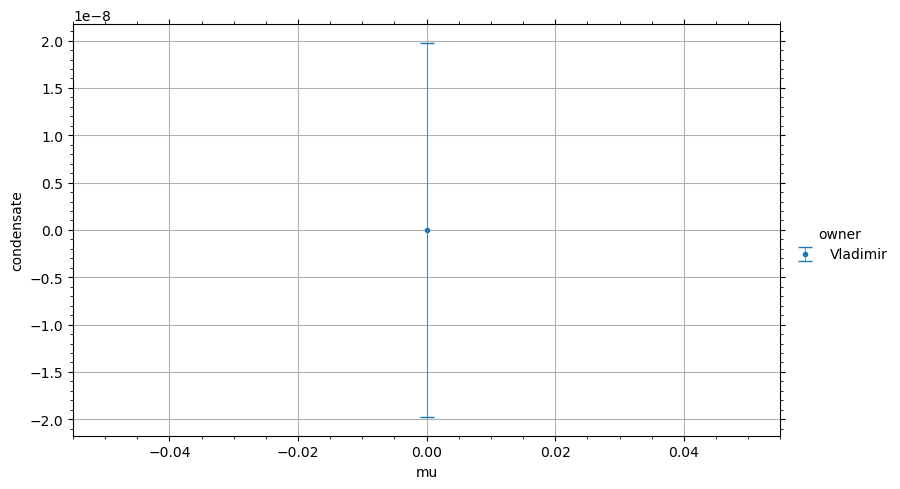

T =  8


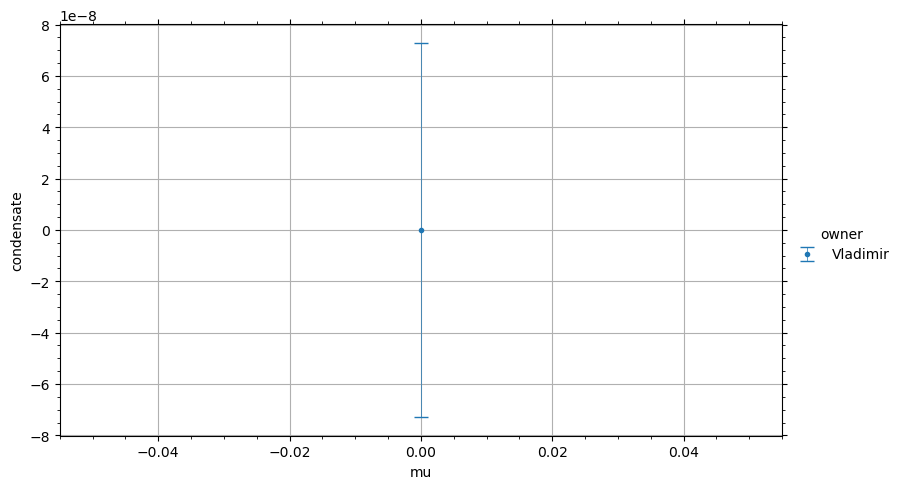

T =  10


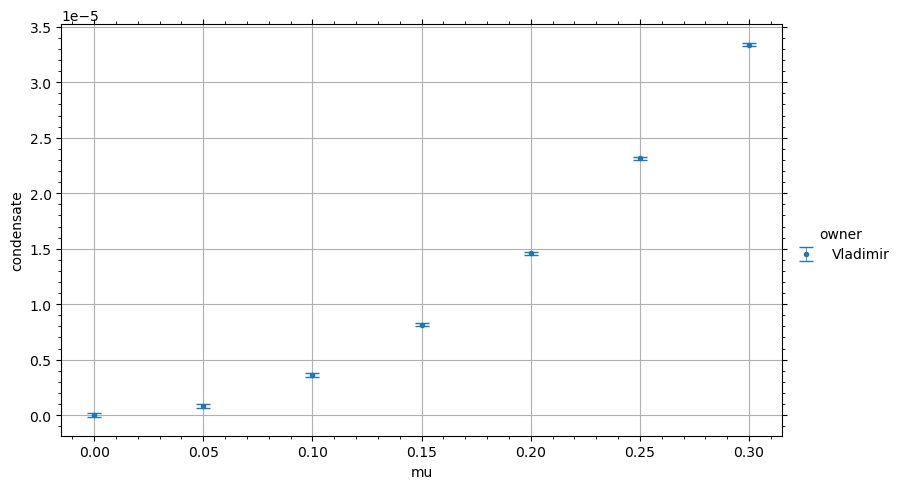

T =  12


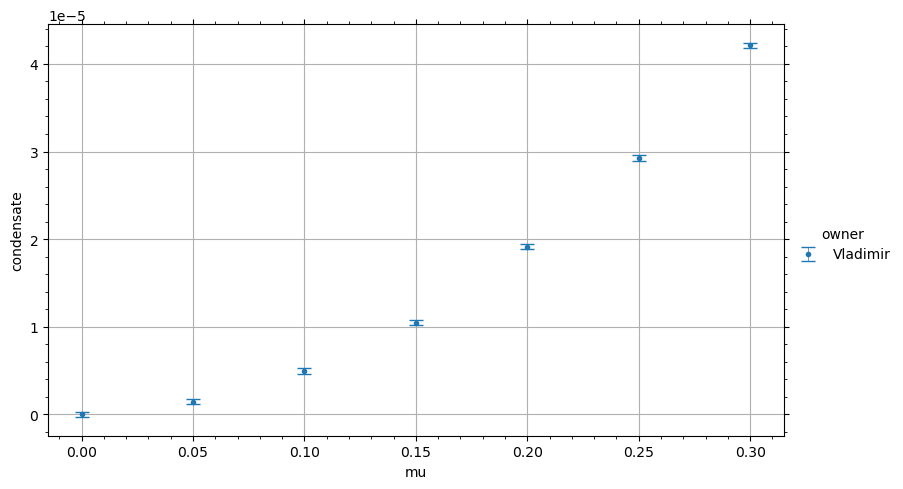

T =  14


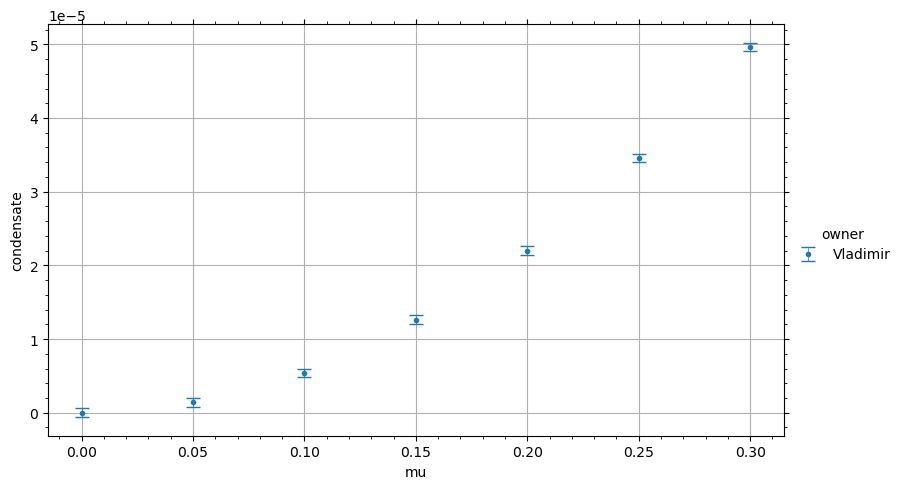

T =  16


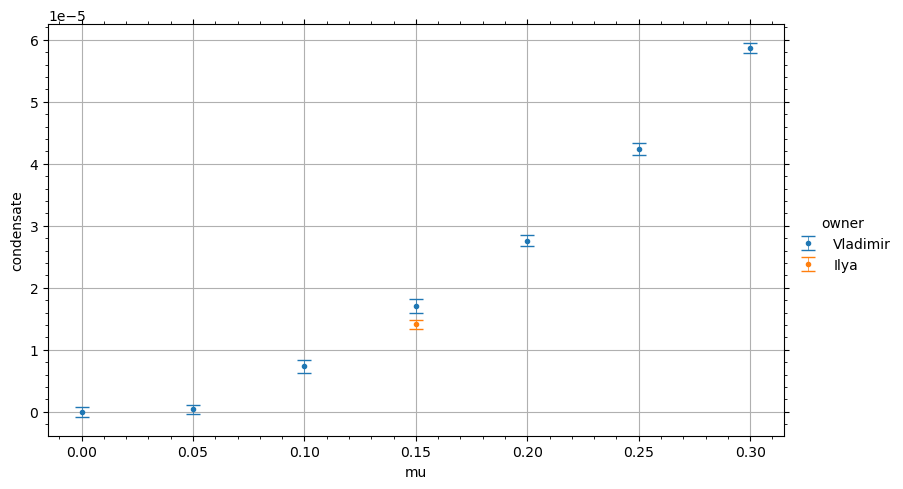

T =  18


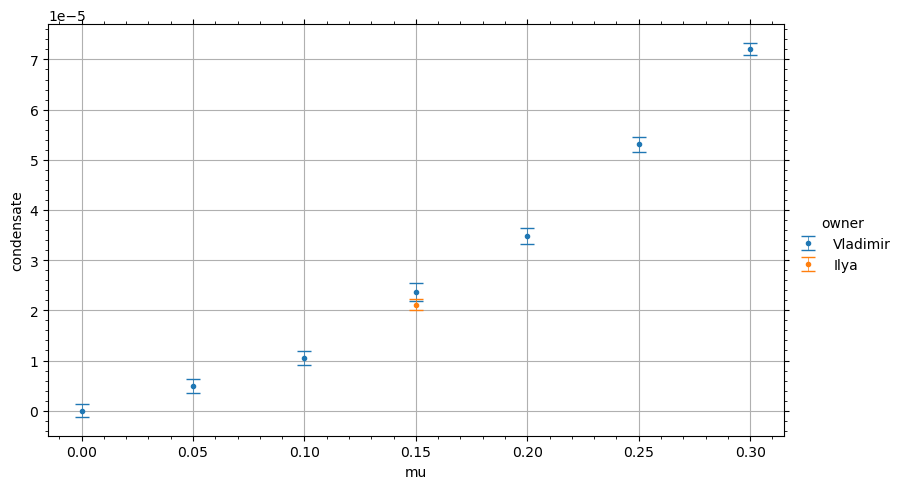

T =  20


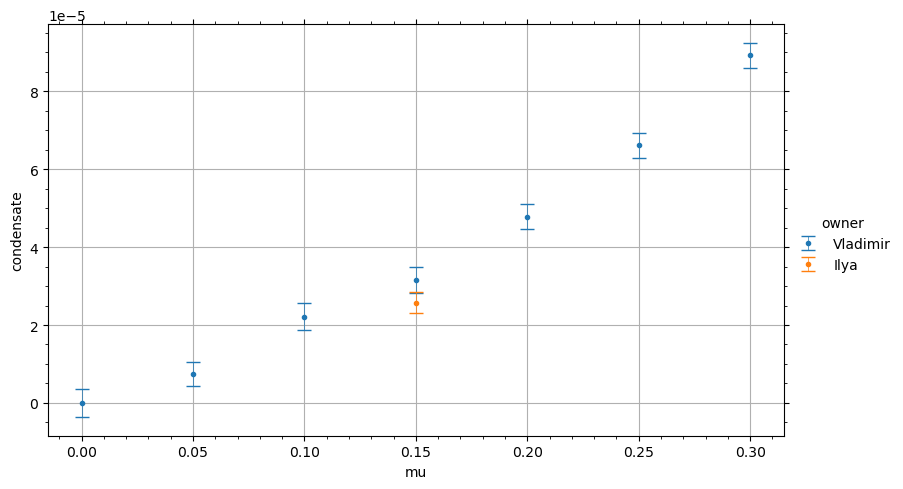

T =  22


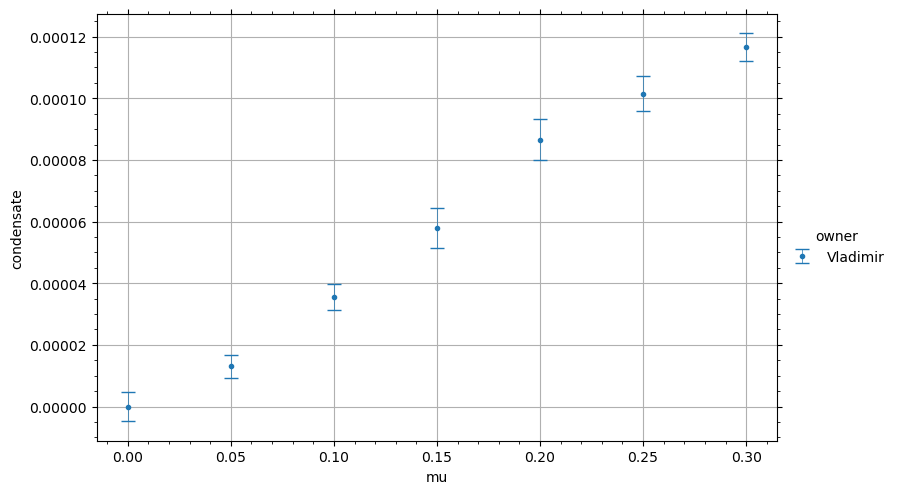

T =  24


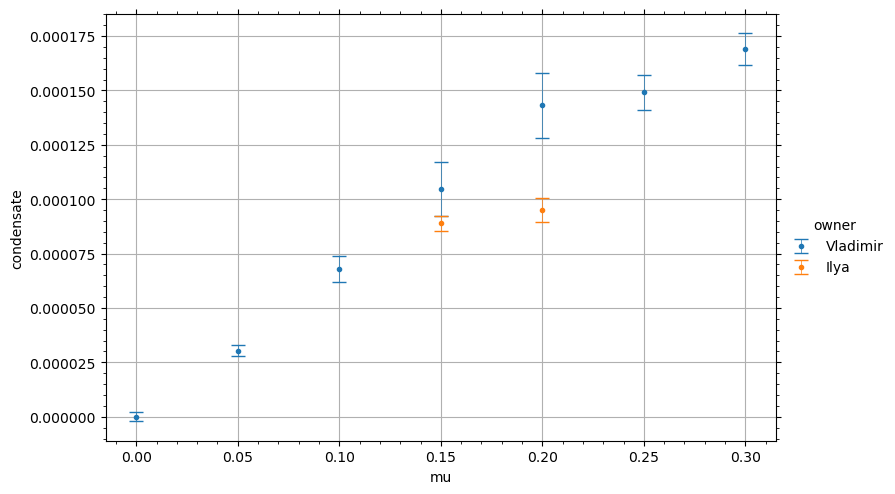

T =  26


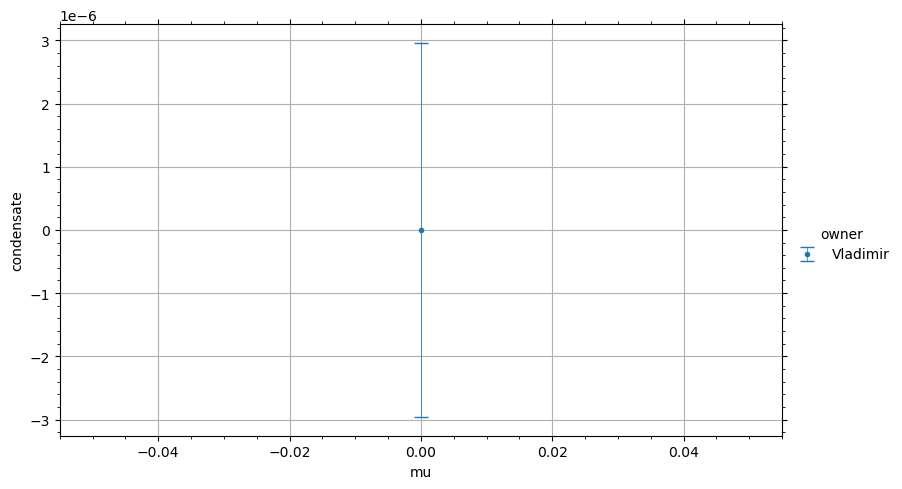

mu =  0.0


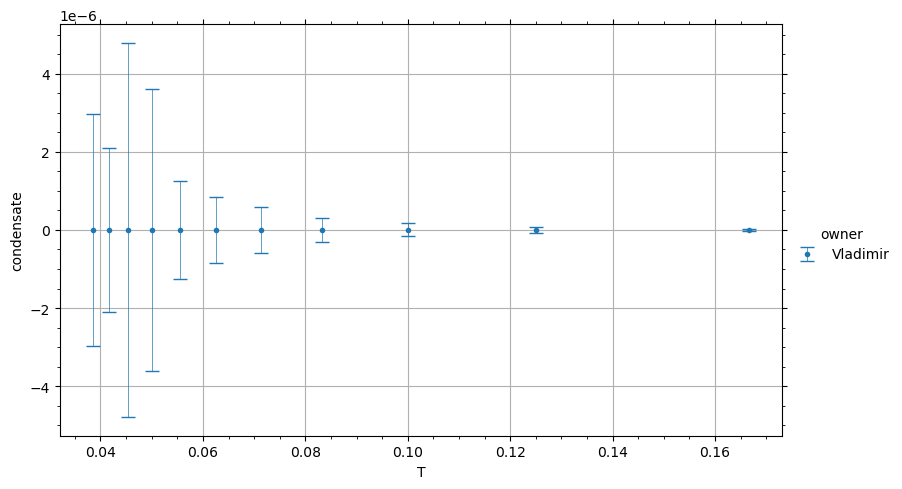

mu =  0.05


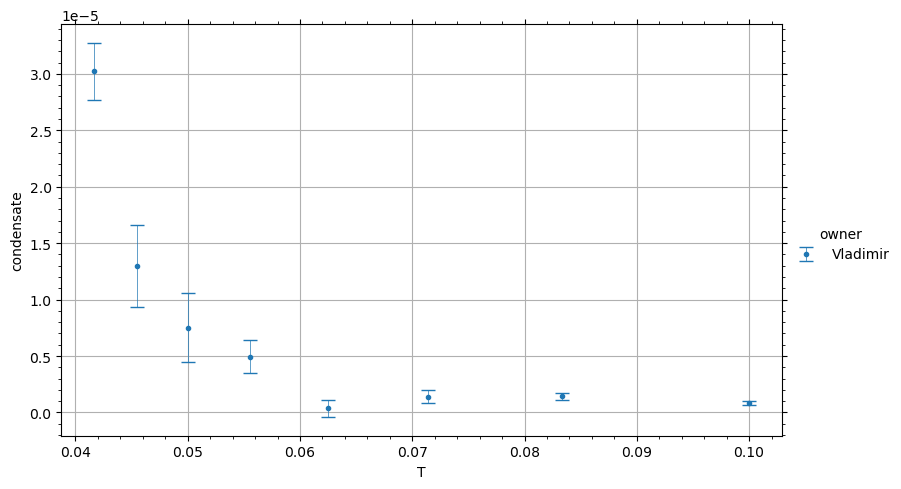

mu =  0.1


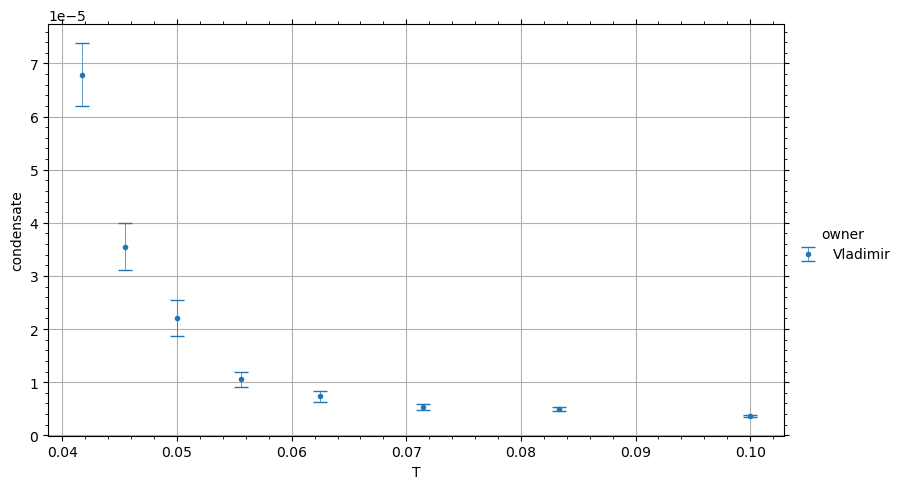

mu =  0.15


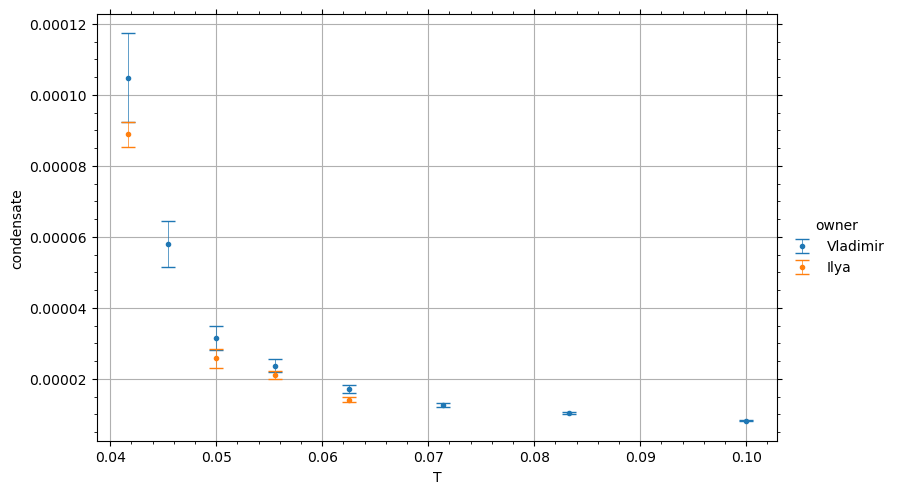

mu =  0.2


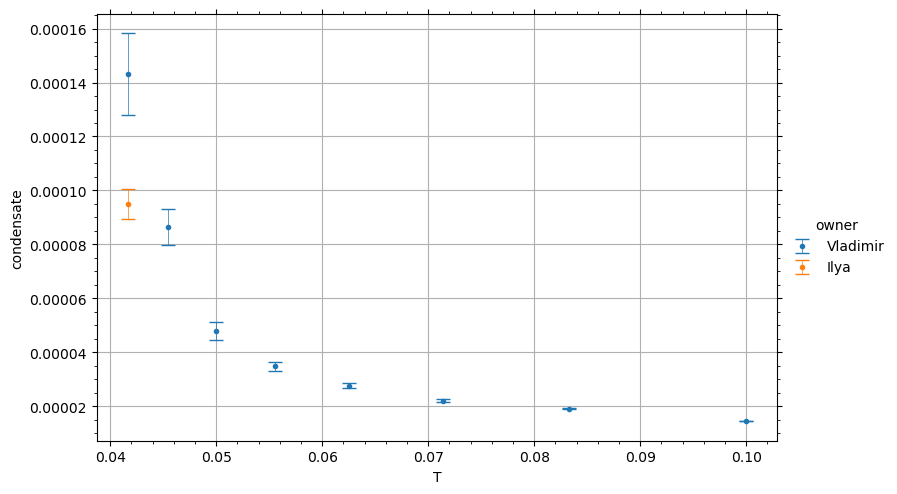

mu =  0.25


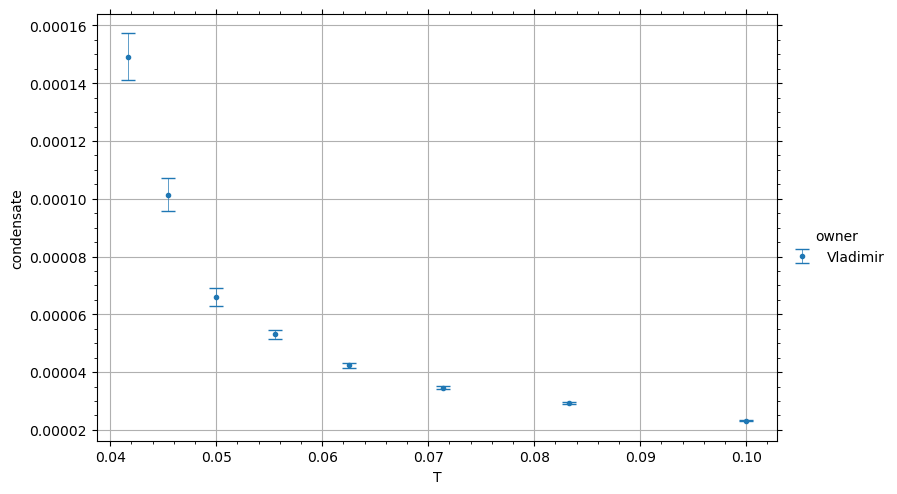

mu =  0.3


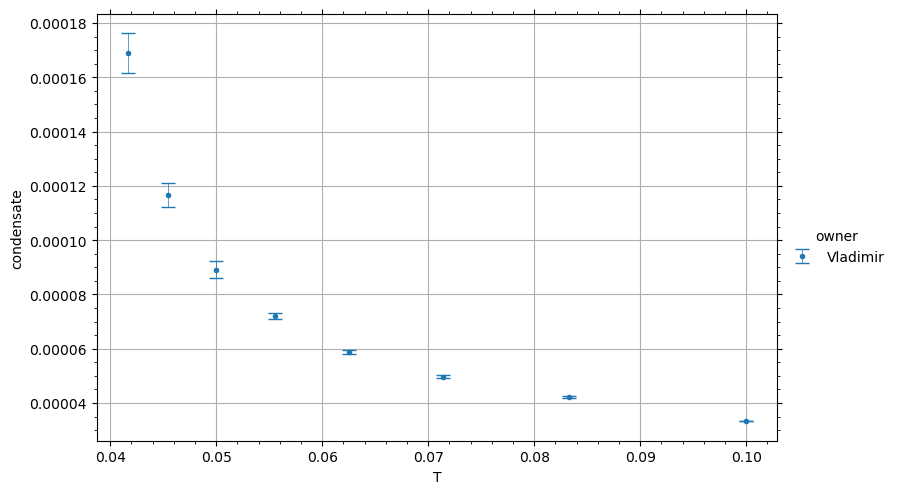

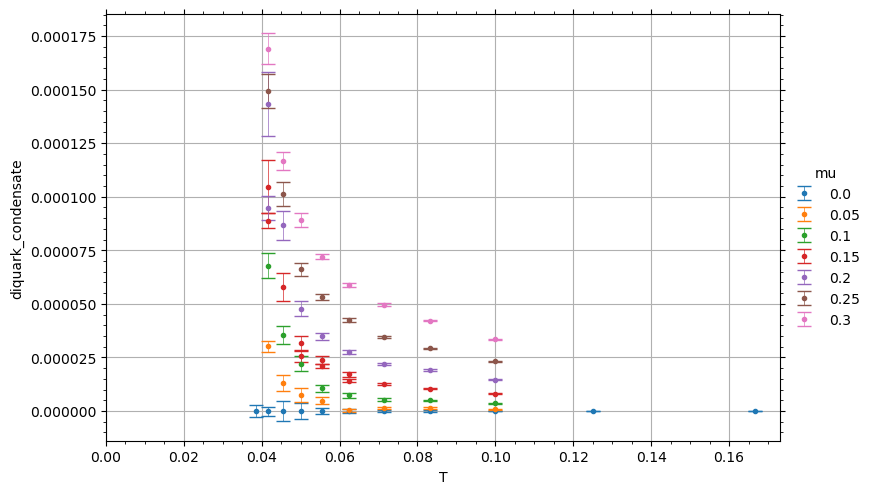

In [6]:
df = pd.read_csv('../../result/vladimir_data/DiquarkCond.txt', header=0, names=['Nt', 'mu', 'diquark_condensate', 'err', 'itime', 'fs', 'W', 's', 'iconf'], delimiter=' ', skipinitialspace=True, comment='#')
df = df[['Nt', 'mu', 'diquark_condensate', 'err']]
df['owner'] = 'Vladimir'
params = [{'path' : '../../result/condensates/su2/qc2dstag/32^3x16/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 16, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x18/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 18, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x20/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 20, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x24/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 24, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x24/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 24, 'mu': 0.20},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x28/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 28, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x28/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 28, 'mu': 0.20},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x36/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 36, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x36/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 36, 'mu': 0.20},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x40/mu0.15/ma=0.0075/condensates_original.csv', 'Nt': 40, 'mu': 0.15},
          {'path' : '../../result/condensates/su2/qc2dstag/32^3x40/mu0.20/ma=0.0075/condensates_original.csv', 'Nt': 40, 'mu': 0.20}]
df1 = collect_condensates(params)
df1 = df1.rename(columns={'err_diquark': 'err'})
df1 = df1[['Nt', 'mu', 'diquark_condensate', 'err']]
df1['owner'] = 'Ilya'
df = pd.concat([df, df1])
# print(df)
print(df[df['Nt'] == 20])
df = df.groupby(['Nt']).apply(renormalize, 'diquark_condensate', include_groups=False).reset_index(level=['Nt'])
print(df)
df['T'] = 1 / df['Nt']
df = df[df['Nt'] < 27]
df.groupby(['Nt']).apply(plot_chiral_condensate_nt, 'diquark_condensate', 'mu', 'T', '../../images/qc2dstag/diquark_condensate', 'diquark_condensate_Nt', include_groups=False)
df.groupby(['mu']).apply(plot_chiral_condensate_nt, 'diquark_condensate', 'T', 'mu', '../../images/qc2dstag/diquark_condensate', 'diquark_condensate_mu', include_groups=False)
# plot_single(df, 'mu', 'Nt', 'diquark_condensate', '../../images/qc2dstag/diquark_condensate', 'diquark_condensate_single_Nt_mu')
plot_single(df, 'T', 'mu', 'diquark_condensate', '../../images/qc2dstag/diquark_condensate', 'diquark_condensate_single_mu_T')

In [94]:
def function_alpha_angle(alpha, mu, mu_c, lambda_m):
    return mu**2 * np.sin(alpha) * np.cos(alpha) - mu_c**2 * (np.sin(alpha) - lambda_m * np.cos(alpha))
print(scipy.optimize.fsolve(function_alpha_angle, 0, args=(0.05, 0.09, 0.1)))
def solve_angle(df, mu_c, lambda_m):
    return scipy.optimize.fsolve(function_alpha_angle, 0, args=(df['mu'], mu_c, lambda_m))[0]

def fit_density(x, a):
    return a * x

def func_density(mu, a):
    return a * mu * np.sin(scipy.optimize.fsolve(function_alpha_angle, 0, args=(df['mu'], 0.9, 0.1))[0])**2

[0.14300386]


In [96]:
df = pd.read_csv('../../result/vladimir_data/QuarkDens.txt', header=0, names=['Nt', 'mu', 'quark_density', 'err', 'itime', 'fs', 'W', 's', 'iconf'], delimiter=' ', skipinitialspace=True, comment='#')
df = df[['Nt', 'mu', 'quark_density', 'err']]
df['owner'] = 'Vladimir'
params = [{'path' : '../../result/quark_density/su2/qc2dstag/32^3x16/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 16, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x18/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 18, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x20/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 20, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x24/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 24, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x24/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 24, 'mu': 0.20},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x28/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 28, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x28/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 28, 'mu': 0.20},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x36/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 36, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x36/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 36, 'mu': 0.20},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x40/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 40, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x40/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 40, 'mu': 0.20}]
df1 = collect_condensates(params)
df1 = df1[['Nt', 'mu', 'quark_density', 'err']]
df1['owner'] = 'Ilya'
df = pd.concat([df, df1])
df['T'] = 1/ df['Nt'] / a
df = df[df['Nt'] < 25]
# print(df)
df['alpha'] = df.apply(solve_angle, axis=1, args=(0.09, 0.1))
df['mu_sin2'] = df['mu'] * np.sin(df['alpha'])**2
# print(df)
df_fit = df.groupby(['T']).apply(fit.make_fit, (0, 1), func_density, ['a'], 'mu_sin2', 'quark_density', 'err', include_groups=False).reset_index(level=-1, drop=True)
print(df_fit)
# df_fit = df.

/tmp/ipykernel_7866/879572738.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return scipy.optimize.fsolve(function_alpha_angle, 0, args=(df['mu'], mu_c, lambda_m))[0]


ValueError: The array returned by a function changed size between calls

    Nt    mu  quark_density           err     owner           T
0   10  0.10       0.000793  1.283964e-06  Vladimir  411.097917
1   10  0.15       0.001343  1.522230e-06  Vladimir  411.097917
2   10  0.20       0.002089  2.039993e-06  Vladimir  411.097917
3   10  0.25       0.003102  1.806428e-06  Vladimir  411.097917
4   10  0.30       0.004476  2.159545e-06  Vladimir  411.097917
5   12  0.05       0.000238  7.812833e-07  Vladimir  342.581597
6   12  0.10       0.000533  1.301590e-06  Vladimir  342.581597
7   12  0.15       0.000940  1.609668e-06  Vladimir  342.581597
8   12  0.20       0.001522  1.792733e-06  Vladimir  342.581597
9   12  0.25       0.002340  1.775653e-06  Vladimir  342.581597
10  12  0.30       0.003466  1.875314e-06  Vladimir  342.581597
11  14  0.05       0.000168  8.029556e-07  Vladimir  293.641369
12  14  0.10       0.000395  1.460937e-06  Vladimir  293.641369
13  14  0.15       0.000724  1.618354e-06  Vladimir  293.641369
14  14  0.20       0.001215  1.893801e-0

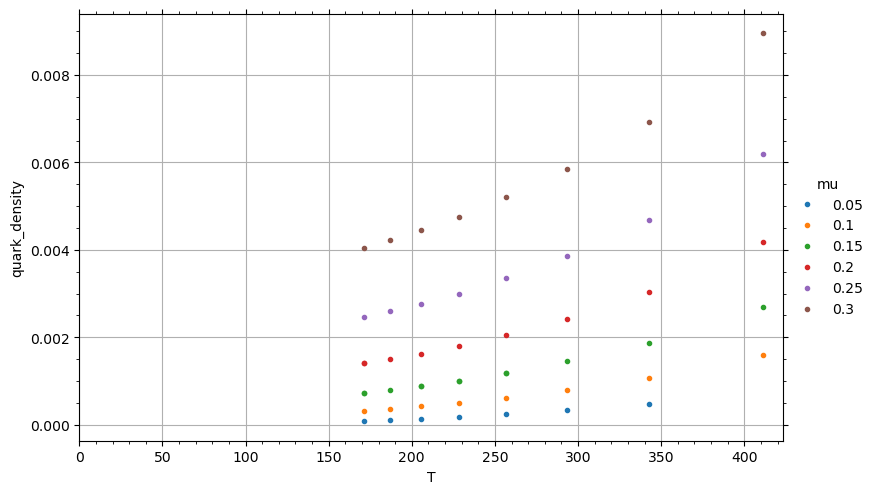

     mu             a         a_err             b         b_err             c  \
0  0.05  4.718612e-12  3.844795e-12  8.506037e-10  3.058579e-09  8.849495e-07   
0  0.10  1.705614e-11  1.622200e-12 -2.571445e-09  1.436823e-09  2.200343e-06   
0  0.15  2.640112e-11  1.303090e-12 -3.904934e-09  1.104682e-09  3.362961e-06   
0  0.20  3.664648e-11  1.810405e-12 -5.073050e-09  1.559884e-09  4.671173e-06   
0  0.25  4.740308e-11  1.822327e-12 -5.576693e-09  1.585503e-09  6.120483e-06   
0  0.30  8.043872e-11  1.891724e-12 -2.249481e-08  1.635817e-09  1.195382e-05   

          c_err         d       err  chi_square   p_value           type  
0  7.910183e-07 -0.000116  0.000066   14.637463  0.000663  extrapolation  
0  4.083677e-07 -0.000070  0.000037    8.905610  0.030573  extrapolation  
0  2.986993e-07  0.000128  0.000026   21.753002  0.002802  extrapolation  
0  4.300062e-07  0.000567  0.000038    7.094874  0.130959  extrapolation  
0  4.418322e-07  0.001336  0.000039    9.363615  0.024827

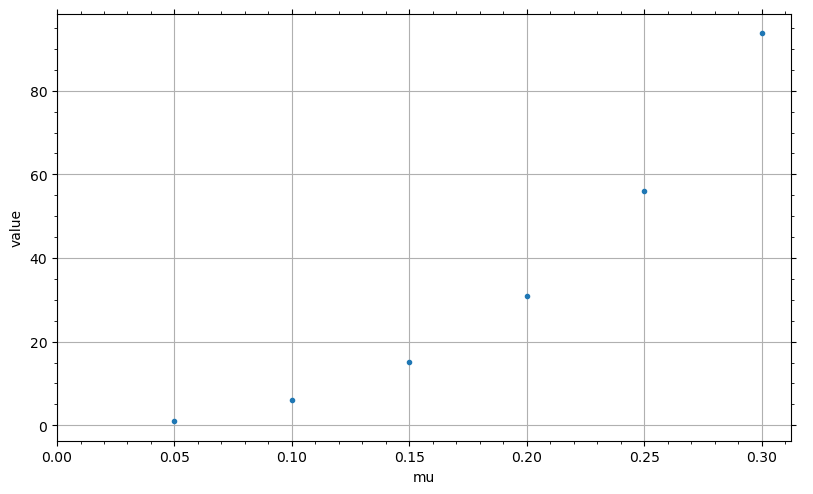

None


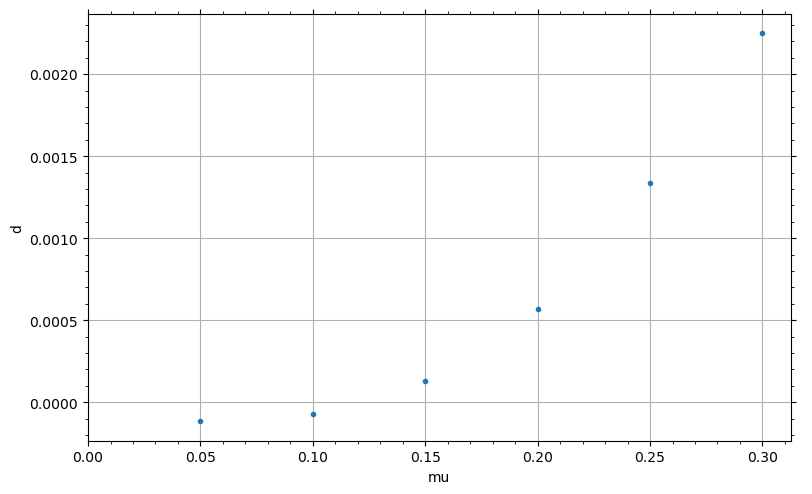

In [88]:
df = pd.read_csv('../../result/vladimir_data/QuarkDens.txt', header=0, names=['Nt', 'mu', 'quark_density', 'err', 'itime', 'fs', 'W', 's', 'iconf'], delimiter=' ', skipinitialspace=True, comment='#')
df = df[['Nt', 'mu', 'quark_density', 'err']]
df['owner'] = 'Vladimir'
params = [{'path' : '../../result/quark_density/su2/qc2dstag/32^3x16/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 16, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x18/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 18, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x20/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 20, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x24/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 24, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x24/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 24, 'mu': 0.20},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x28/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 28, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x28/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 28, 'mu': 0.20},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x36/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 36, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x36/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 36, 'mu': 0.20},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x40/mu0.15/ma=0.0075/quark_density_original.csv', 'Nt': 40, 'mu': 0.15},
          {'path' : '../../result/quark_density/su2/qc2dstag/32^3x40/mu0.20/ma=0.0075/quark_density_original.csv', 'Nt': 40, 'mu': 0.20}]
df1 = collect_condensates(params)
df1 = df1[['Nt', 'mu', 'quark_density', 'err']]
df1['owner'] = 'Ilya'
df = pd.concat([df, df1])
df['T'] = 1/ df['Nt'] / a
df = df[df['Nt'] < 25]
print(df)
# df['quark_density'] = df['quark_density'] / a**3 / df['T']**3
df['quark_density'] = 2 * df['quark_density']
# print(df)
# df.groupby(['Nt']).apply(plot_chiral_condensate_nt, 'quark_density', 'mu', 'Nt', '../../images/qc2dstag/quark_density', 'quark_density_Nt', include_groups=False)
# df.groupby(['mu']).apply(plot_chiral_condensate_nt, 'quark_density', 'T', 'mu', '../../images/qc2dstag/quark_density', 'quark_density_mu', include_groups=False)
# plot_single(df, 'mu', 'T', 'quark_density', '../../images/qc2dstag/quark_density', 'quark_density_single_T_mu')
plot_single(df, 'T', 'mu', 'quark_density', '../../images/qc2dstag/quark_density', 'quark_density_single_mu_T')
df_fit = df.groupby(['mu']).apply(fit_data, 'quark_density', include_groups=False).reset_index(level='mu')
# df_fit = fit_data(df, 'quark_density')
df_fit = df_fit.rename(columns={'d_err': 'err'})
df_fit['type'] = 'extrapolation'
print(df_fit)
fit_val = df_fit.groupby(['mu']).apply(get_func_value, fit.func_polynomial3, 140, ['a', 'b', 'c', 'd'], include_groups=False).reset_index(level='mu')
print(fit_val)
fit_val['value'] = fit_val['value'] / a**3 / 140**3
plot_single(fit_val, 'mu', None, 'value', '../../images/qc2dstag/quark_density', 'quark_density_single_mu_T')
plot_single(df_fit, 'mu', None, 'd', '../../images/qc2dstag/quark_density', 'quark_density_single_mu_T')

In [2]:
def read_chiral_condensate_allin(path):
    with open(path) as file:
        indices = []
        df = []
        data_tmp = []
        conf_num = 0
        while line := file.readline():
            if(line[0] == '#'):
                if(line.startswith('# IPARAM')):
                    # print(line)
                    if len(data_tmp) > 0:
                        df.append(pd.DataFrame({'condensate': data_tmp}))
                        df[-1]['conf_num'] = conf_num
                    data_tmp = []
                    index = line.find('iconf')
                    conf_num = int(line[index + 5 : index + 9].rstrip())
            else:
                data_tmp.append(float(line[:line.find('\t')]))
        df.append(pd.DataFrame({'condensate': data_tmp}))
        df[-1]['conf_num'] = conf_num
    return pd.concat(df)

In [3]:
df = read_chiral_condensate_allin('../../result/chiral_condensate/su2/qc2dstag/40^4/mu0.00/goy_result/Condensates.txt')
N = len(df.index)
df = df.groupby('conf_num').apply('mean').agg(('mean', 'std'))
df.loc['std', 'condensate'] = df.loc['std', 'condensate'] / np.sqrt(N)
df = df.stack().unstack(level=-2).rename({'mean': 'chiral_condensate', 'std': 'err'}, axis=1).reset_index(drop=True)
df['mu'] = '0.00'
df['hue'] = 'goy'
df1 = df
print(df1)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/chiral_condensate/su2/qc2dstag/40^4/mu0.00/goy_result/Condensates.txt'

In [4]:
df = []
for mu in ['0.00', '0.05', '0.15']:
# for mu in ['0.00']:
    df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/ChiralCond_original.csv'))
    df[-1]['mu'] = mu
df = pd.concat(df)
df['hue'] = 'my'
df = df.drop('copy', axis=1)
df = pd.concat([df, df1])
print(df)
fg = seaborn.FacetGrid(data=df, hue='hue', height=5, aspect=1.61, legend_out=True)
fg.map(plt.errorbar, 'mu', 'chiral_condensate', 'err', mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None
           ).add_legend()
fg.ax.set_xlabel('mu')
fg.ax.set_ylabel('condensate')
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
fg.ax.tick_params(which='both', bottom=True,
                  top=True, left=True, right=True)
plt.grid(dash_capstyle='round')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../result/chiral_condensate/su2/qc2dstag/40^4/mu0.00/ChiralCond_original.csv'

In [5]:
def linear_fit(df, x_col, y_col, err_col):
    if err_col is not None:
        y_err = df[err_col]
    else:
        y_err = None
    popt, pcov, *output = curve_fit(func_linear, df[x_col], df[y_col], sigma=y_err, absolute_sigma=True, full_output=True)
    return pd.DataFrame({'a': [popt[0]], 'b': [popt[1]]})

def func_linear(x, a, b):
    return a + b * x

def make_fit_line(df, x_col, y_col, x_max):
    x = np.linspace(0, x_max, 1000)
    y = func_linear(x, df.loc[0, 'a'], df.loc[0, 'b'])
    return pd.DataFrame({x_col: x, y_col: y})

   copy  chiral_condensate           err    mu      ma decomposition_type
0     0           0.001690  2.053191e-06  0.00  0.0037                su2
0     0           0.004808  7.918789e-06  0.00  0.0037           monopole
0     0           0.001259  4.001503e-08  0.00  0.0037         monopoless
0     0           0.003057  1.494653e-06  0.00  0.0075                su2
0     0           0.006214  6.681708e-06  0.00  0.0075           monopole
0     0           0.002552  7.766465e-08  0.00  0.0075         monopoless
0     0           0.005713  1.141281e-06  0.00  0.0150                su2
0     0           0.008803  5.633870e-06  0.00  0.0150           monopole
0     0           0.005099  1.351434e-07  0.00  0.0150         monopoless
0     0           0.001607  1.098515e-05  0.05  0.0037                su2
0     0           0.004616  1.526377e-05  0.05  0.0037           monopole
0     0           0.001254  4.579175e-08  0.05  0.0037         monopoless
0     0           0.003029  3.516411e-

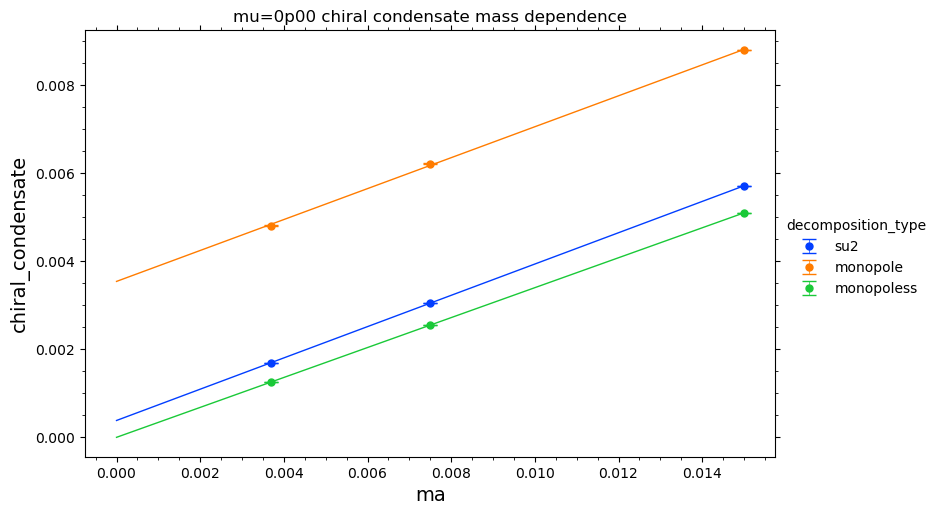

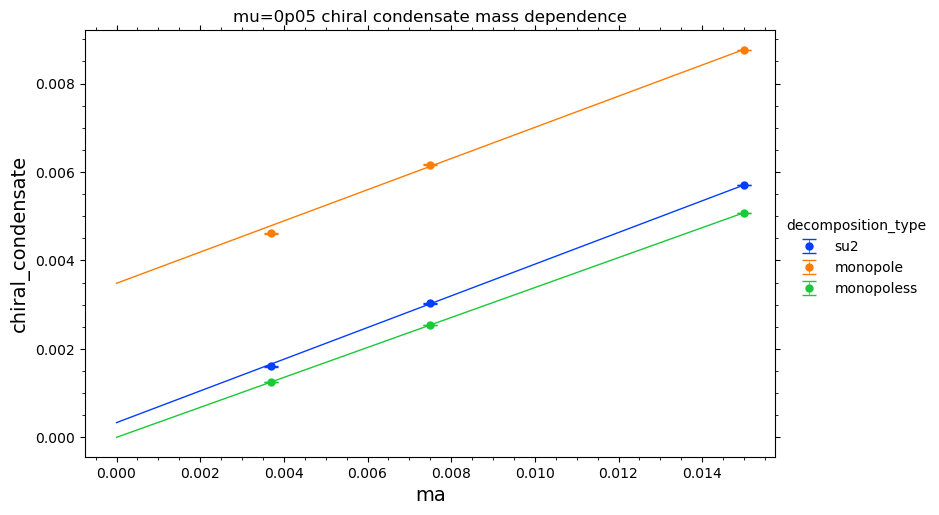

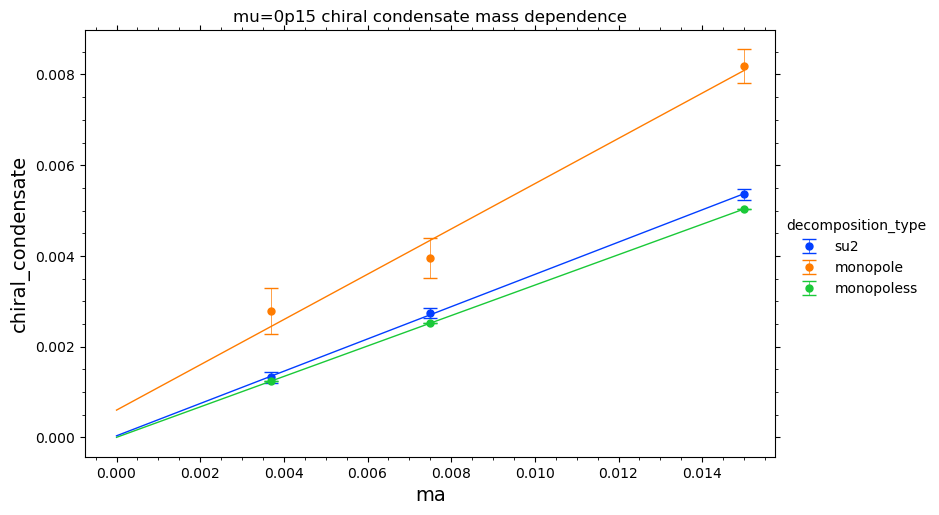

In [6]:
df = []
for mu in ['0.00', '0.05']:
# for mu in ['0.00']:
    for ma in ['0.0037', '0.0075', '0.015']:
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/ma={ma}/ChiralCond_original.csv'))
        df[-1]['mu'] = mu
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'su2'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/qc2dstag/ma={ma}/ChiralCond_monopole.csv'))
        df[-1]['mu'] = mu
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopole'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/qc2dstag/ma={ma}/ChiralCond_monopoless.csv'))
        df[-1]['mu'] = mu
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopoless'
for mu in ['0.15']:
    for ma in ['0.0037', '0.0075', '0.015']:
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/ma={ma}/ChiralCond_original.csv'))
        df[-1]['mu'] = mu
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'su2'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/T_step=0.001/qc2dstag/ma={ma}/ChiralCond_monopole.csv'))
        df[-1]['mu'] = mu
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopole'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/T_step=0.001/qc2dstag/ma={ma}/ChiralCond_monopoless.csv'))
        df[-1]['mu'] = mu
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopoless'
df = pd.concat(df)
print(df)
df_fit = df.groupby(['decomposition_type', 'mu']).apply(linear_fit, 'ma', 'chiral_condensate', 'err').reset_index(level=['decomposition_type', 'mu'])
print(df_fit)
df_fit_line = df_fit.groupby(['decomposition_type', 'mu']).apply(make_fit_line, 'ma', 'chiral_condensate', df['ma'].max()).reset_index(level=['decomposition_type', 'mu'])
print(df_fit_line)
image_path = '../../images/chiral_condensate'
for mu in ['0.00', '0.05', '0.15']:
    mu_string = mu.replace('.', 'p')
    ax = plots.make_plot(df[df['mu'] == mu], 'ma', 'chiral_condensate', 'decomposition_type', 'ma', 'chiral_condensate', f'mu={mu_string} chiral condensate mass dependence', '', '', False, df_fits=df_fit_line[df_fit_line['mu'] == mu], err='err')
    plots.save_image(image_path, f'mu={mu_string} chiral condensate mass dependence', ax)
    plt.show()

   copy  chiral_condensate           err    mu      ma decomposition_type
0     0           0.001690  2.053191e-06  0.00  0.0037                su2
0     0           0.004808  7.918789e-06  0.00  0.0037           monopole
0     0           0.001259  4.001503e-08  0.00  0.0037         monopoless
0     0           0.003057  1.494653e-06  0.00  0.0075                su2
0     0           0.006214  6.681708e-06  0.00  0.0075           monopole
0     0           0.002552  7.766465e-08  0.00  0.0075         monopoless
0     0           0.005713  1.141281e-06  0.00  0.0150                su2
0     0           0.008803  5.633870e-06  0.00  0.0150           monopole
0     0           0.005099  1.351434e-07  0.00  0.0150         monopoless
0     0           0.001607  1.098515e-05  0.05  0.0037                su2
0     0           0.004616  1.526377e-05  0.05  0.0037           monopole
0     0           0.001254  4.579175e-08  0.05  0.0037         monopoless
0     0           0.003029  3.516411e-

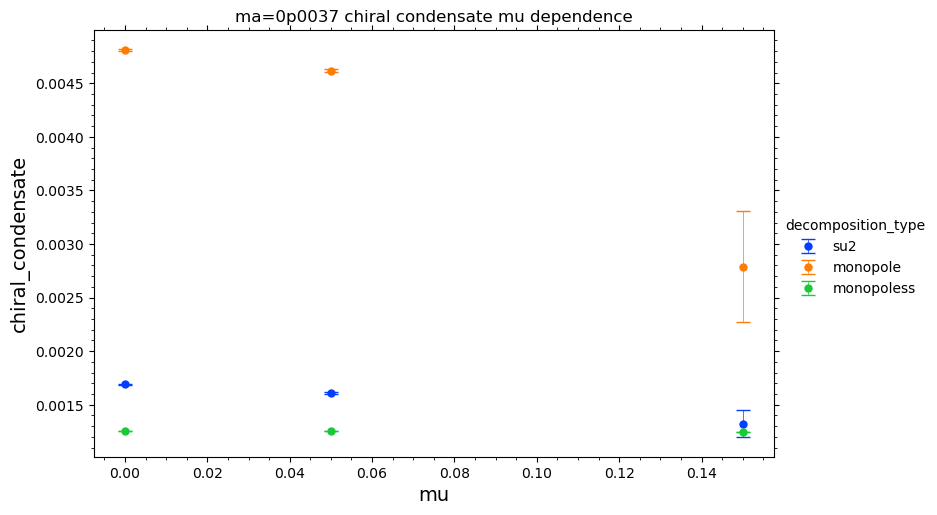

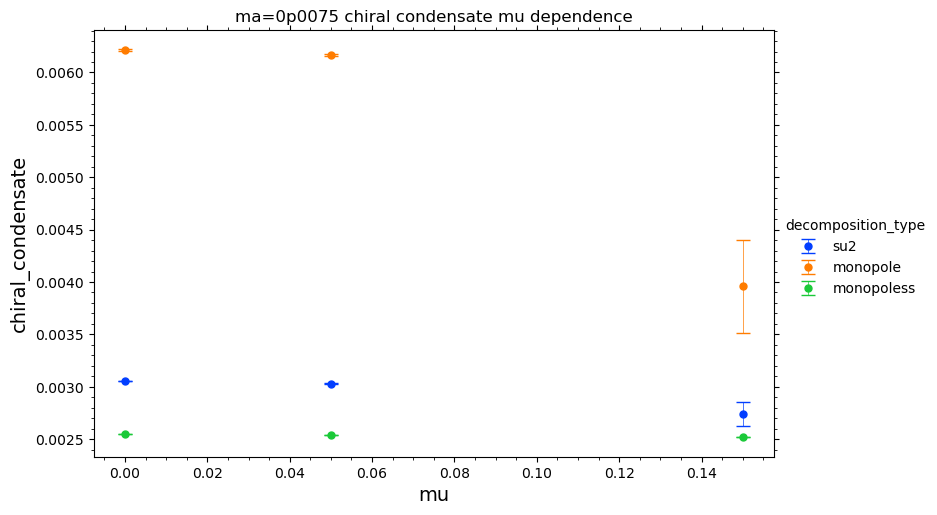

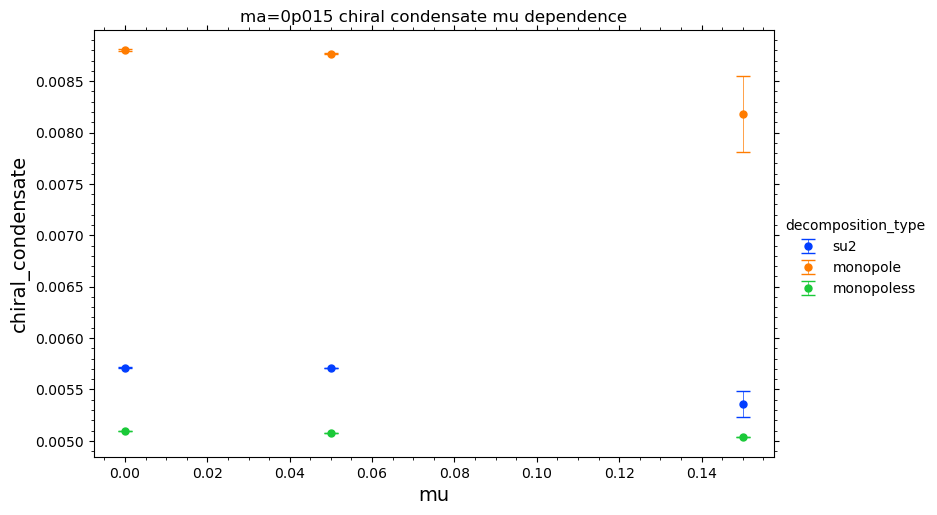

In [7]:
df = []
for mu in ['0.00', '0.05']:
# for mu in ['0.00']:
    for ma in ['0.0037', '0.0075', '0.015']:
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/ma={ma}/ChiralCond_original.csv'))
        df[-1]['mu'] = float(mu)
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'su2'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/qc2dstag/ma={ma}/ChiralCond_monopole.csv'))
        df[-1]['mu'] = float(mu)
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopole'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/qc2dstag/ma={ma}/ChiralCond_monopoless.csv'))
        df[-1]['mu'] = float(mu)
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopoless'
for mu in ['0.15']:
    for ma in ['0.0037', '0.0075', '0.015']:
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/ma={ma}/ChiralCond_original.csv'))
        df[-1]['mu'] = float(mu)
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'su2'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/T_step=0.001/qc2dstag/ma={ma}/ChiralCond_monopole.csv'))
        df[-1]['mu'] = float(mu)
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopole'
        df.append(pd.read_csv(f'../../result/chiral_condensate/su2/qc2dstag/40^4/mu{mu}/T_step=0.001/qc2dstag/ma={ma}/ChiralCond_monopoless.csv'))
        df[-1]['mu'] = float(mu)
        df[-1]['ma'] = float(ma)
        df[-1]['decomposition_type'] = 'monopoless'
df = pd.concat(df)
print(df)
image_path = '../../images/chiral_condensate'
for ma in ['0.0037', '0.0075', '0.015']:
    ma_string = ma.replace('.', 'p')
    ax = plots.make_plot(df[df['ma'] == float(ma)], 'mu', 'chiral_condensate', 'decomposition_type', 'mu', 'chiral_condensate', f'ma={ma_string} chiral condensate mu dependence', '', '', False, err='err')
    plots.save_image(image_path, f'ma={ma_string} chiral condensate mu dependence', ax)
    plt.show()